In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso #ordinary linear regression + w/ ridge regularization
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import math
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import ast
import pandas as pd
import numpy as np
import time
import requests
import pickle
from lxml import html
import unicodecsv as csv
import argparse
from __future__ import print_function, division
import ast
from bs4 import BeautifulSoup
from lxml import html
import requests
import unicodecsv as csv
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [80]:
with open("denver.pkl", 'rb') as picklefile: 
    denver= pickle.load(picklefile)

/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


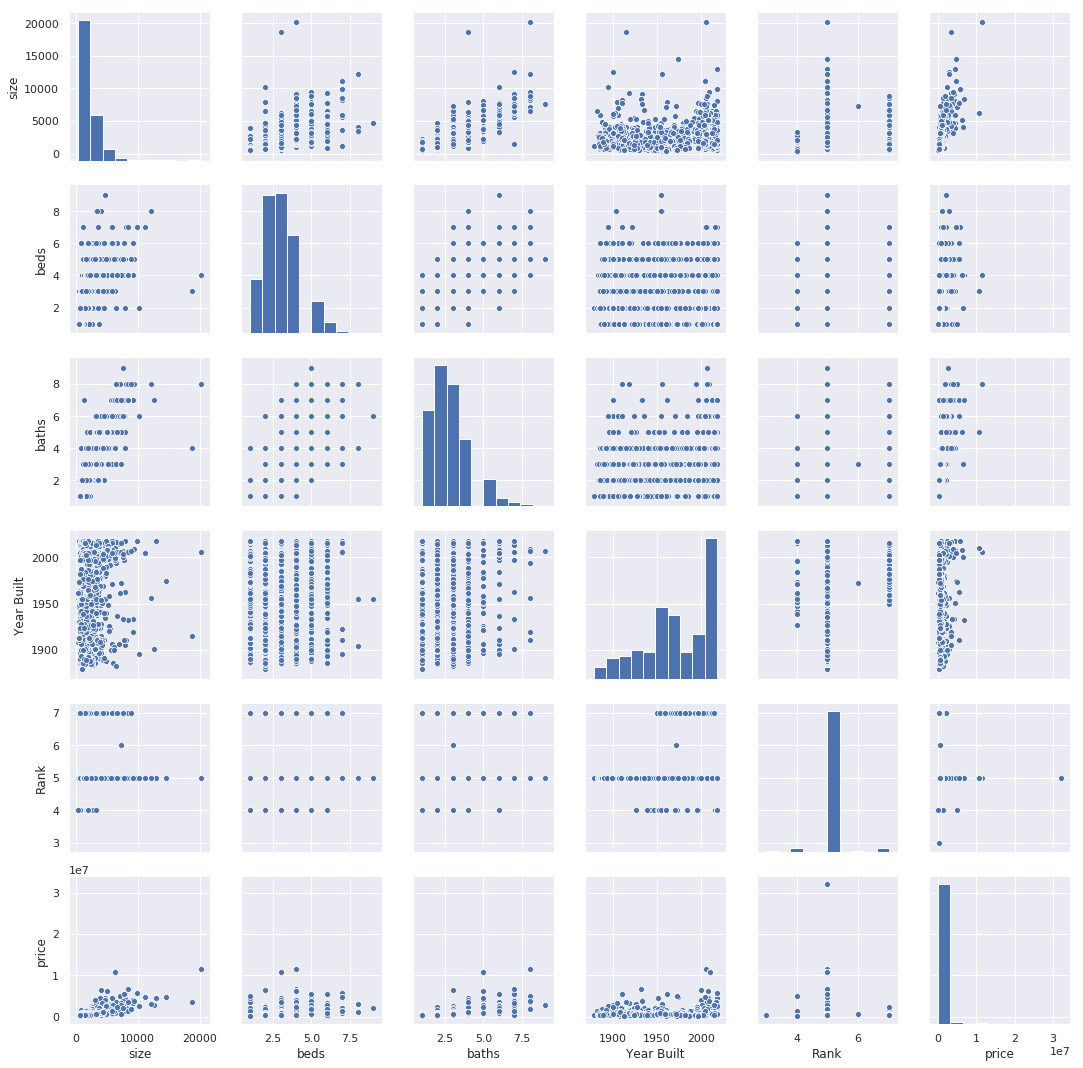

In [84]:
# Pairplot with outliers
sns.pairplot(denver[['size','beds','baths','Year Built','Rank','price']])

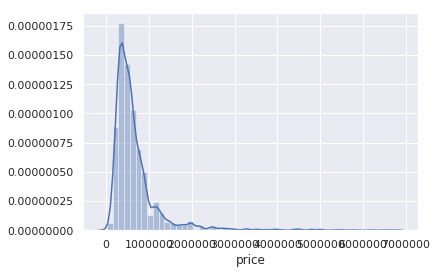

In [777]:
# Price distribution without outliers
sns.distplot(denver['price'])

In [37]:
#denver = denver[(denver['price']<2000000) & (denver['price']>100000)]

/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


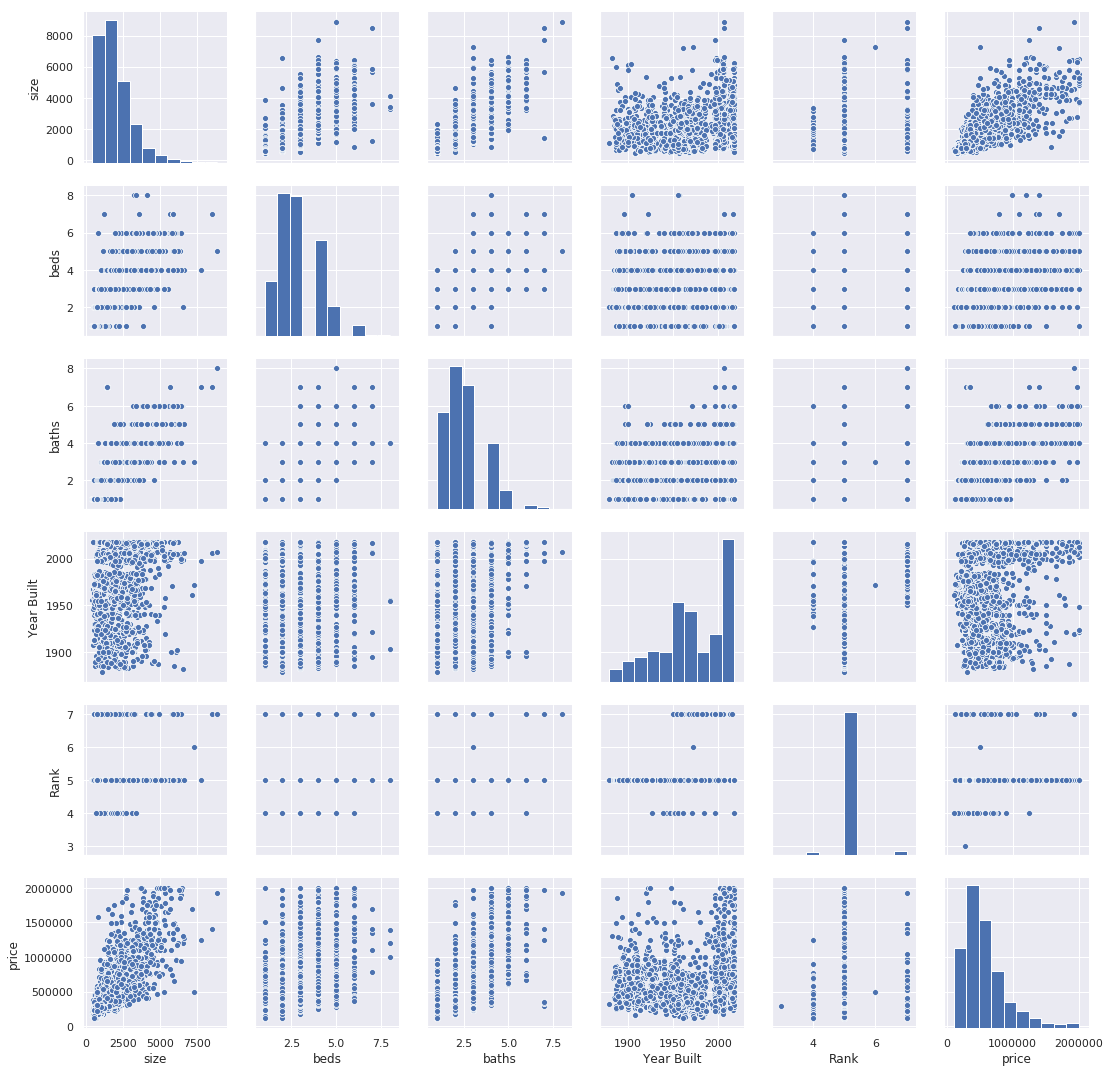

In [38]:
# Pairplot without outliers
sns.pairplot(denver[['size','beds','baths','Year Built','Rank','Parking2','price','Cooling2']])

Text(0, 0.5, 'Price (USD)')

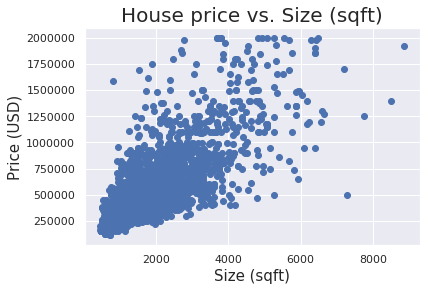

In [39]:
sns.set()
plt.scatter(denver['size'],denver['price'])
plt.title('House price vs. Size (sqft)',fontsize=20)
plt.xlabel('Size (sqft)',fontsize=15)
plt.ylabel('Price (USD)',fontsize=15)

Text(0, 0.5, 'Price (USD)')

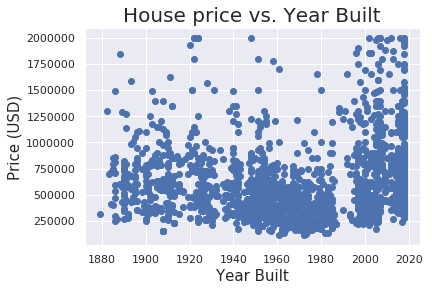

In [40]:
plt.scatter(denver['Year Built'],denver['price'])
plt.title('House price vs. Year Built',fontsize=20)
plt.xlabel('Year Built',fontsize=15)
plt.ylabel('Price (USD)',fontsize=15)

In [41]:
denver[['size','beds','baths','Year Built','Rank','Parking2','price','Heating2']].corr()

,size,beds,baths,Year Built,Rank,price
size,1.00,0.71,0.77,0.17,0.09,0.73
beds,0.71,1.00,0.60,-0.02,-0.01,0.46
baths,0.77,0.60,1.00,0.40,0.06,0.66
Year Built,0.17,-0.02,0.40,1.00,0.05,0.12
Rank,0.09,-0.01,0.06,0.05,1.00,0.01
price,0.73,0.46,0.66,0.12,0.01,1.00


In [87]:
m = denver[['size','price','beds','baths','Year Built','Rank','Parking2','Type','Cooling2']].dropna()

In [71]:
m['Parking2']=m['Parking2'].astype('str')

In [72]:
m.count()

size          1915
price         1915
beds          1915
baths         1915
Year Built    1915
Rank          1915
Parking2      1915
Type          1915
Cooling2      1915
dtype: int64

In [88]:
m = pd.get_dummies(m)
X, y = m.drop('price',axis=1), m['price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) #hold out 20% for validation


lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)
X_poly = poly.transform(X)

lm_poly = LinearRegression()

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_poly, poly.fit_transform(X), y, cv=kf, scoring='r2')))

0.438586584364
0.790047833548


In [103]:
lm_poly.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
coeffs_ = {'variable':list(poly.get_feature_names(X.columns)),'Coeff':list(lm_poly.coef_)}
coeffs_ = pd.DataFrame(coeffs)
coeffs_2 = coeffs[(coeffs['Coeff']>0.1)|(coeffs['Coeff']<-0.1)]
coeffs_2['abs']=abs(coeffs2['Coeff'])
coeffs_2=coeffs2.sort_values(by='abs',ascending=True)
#coeffs_2

model = sm.OLS(y,X_poly)
fit = model.fit()
fit.summary() # This is the advantage of stats model vs sklearn

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sat, 13 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:36:15   Log-Likelihood:                -20884.
No. Observations:                1461   AIC:                         4.191e+04
Df Residuals:                    1389   BIC:                         4.229e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.361e+07   1.28e+07      1.847      0.065   -1.46e+06    4.87e+07
x1          -297.6503    493.356     -0.603      0.546   -1265.454     670.153
x2          1.306e+06   4.52e+05      2.887      0.004    4.18e+05    2.19e+06
x3         -9.304e+05   5.99e+05     -1.553      0.121   -2.11e+06    2.45e+05
x4         -4.059e+04      2e+04     -2.030      0.043   -7.98e+04   -1359.125
x5         -4.981e+05   2.26e+06     -0.221      0.825   -4.93e+06    3.93e+06
x6          5.954e+06   3.16e+06      1.886      0.059   -2.38e+05    1.21e+07
x7           6.53e+06   3.32e+06      1.968      0.049    1.98e+04     1.3e+07
x8          6.122e+06   3.26e+06      1.877      0.061   -2.75e+05    1.25e+07
x9          5.005e+06   3.23e+06      1.548      0.122   -1.34e+06    1.13e+07
x10         5.862e+06   4.37e+06      1.341      0.180   -2.71e+06    1.44e+07
x11         8807.2388   1.01e+04      0.872      0.383    -1.1e+04    2.86e+04
x12         1.034e+07   4.17e+06      2.479      0.013    2.16e+06    1.85e+07
x13         7.402e+06   4.36e+06      1.698      0.090   -1.15e+06     1.6e+07
x14          1.25e+07   6.44e+06      1.939      0.053   -1.45e+05    2.51e+07
x15         1.111e+07   6.35e+06      1.749      0.080   -1.35e+06    2.36e+07
x16            0.0062      0.012      0.501      0.616      -0.018       0.031
x17          -54.6146     16.391     -3.332      0.001     -86.768     -22.461
x18          157.2250     28.506      5.515      0.000     101.305     213.145
x19            0.8920      0.476      1.872      0.061      -0.043       1.827
x20         -138.4665     54.839     -2.525      0.012    -246.043     -30.890
x21         -103.5150    126.631     -0.817      0.414    -351.924     144.894
x22         -354.7314    137.822     -2.574      0.010    -625.093     -84.369
x23          179.5200    133.350      1.346      0.178     -82.068     441.108
x24          -19.8478    130.673     -0.152      0.879    -276.186     236.491
x25          836.0793    267.471      3.126      0.002     311.388    1360.771
x26          654.1527    823.900      0.794      0.427    -962.071    2270.376
x27         -851.8753    260.967     -3.264      0.001   -1363.806    -339.944
x28         -936.9267    268.622     -3.488      0.001   -1463.876    -409.977
x29         -170.9254    252.810     -0.676      0.499    -666.856     325.005
x30         -127.6393    242.483     -0.526      0.599    -603.312     348.033
x31        -7871.1291   1.16e+04     -0.678      0.498   -3.06e+04    1.49e+04
x32        -1.897e+04   2.42e+04     -0.785      0.433   -6.64e+04    2.84e+04
x33        -1408.4659    467.818     -3.011      0.003   -2326.172    -490.760
x34         4.228e+04   4.79e+04      0.883      0.377   -5.16e+04    1.36e+05
x35         3.458e+05   1.15e+05      2.997      0.003    1.19e+05    5.72e+05
x3

In [107]:
len(lm_poly.coef_)

136

Text(0, 0.5, 'Predicted')

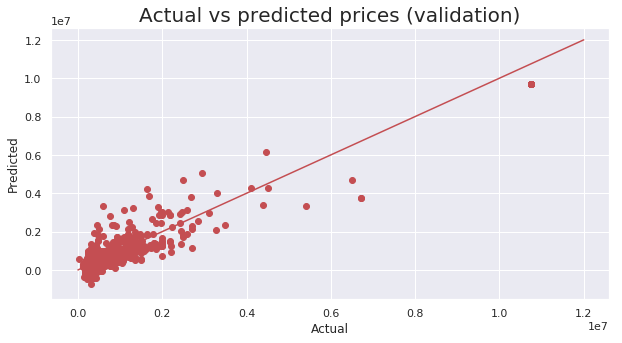

In [93]:
lm_poly.fit(X_poly,y)
y_pred = lm_poly.predict(X_poly)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,12000000,1000),np.linspace(0,12000000,1000),c="r")
plt.scatter(y,y_pred,c='r')
plt.title('Actual vs predicted prices (validation)',fontsize=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [78]:
#model = sm.OLS(y_train,X_train_poly)
#fit = model.fit()
#fit.summary()

In [94]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)
X_test_scaled = scaler.transform(X_test_poly)
X_scaled = scaler.transform(X_poly)

#alphas=np.logspace(-1,3,20)

lm_Lasso = LassoCV(cv=kf)
lm_Lasso.fit(X_scaled,y)
#lm_Lasso.score(X_scaled,y)
lm_Lasso.score(X_test_scaled,y_test)
#lm_Lasso.score(X_scaled,y)

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.82863746607965127

Text(0, 0.5, 'Predicted')

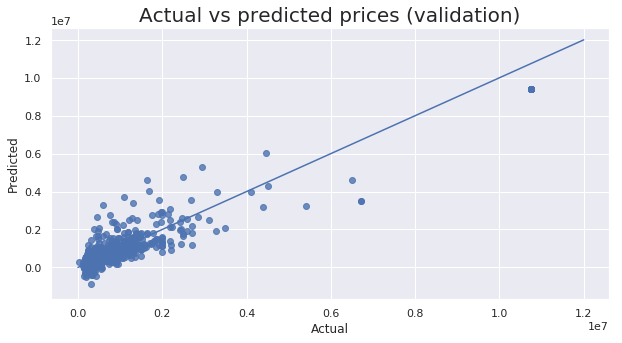

In [96]:
plt.figure(figsize=(10,5))

y_pred = lm_poly.predict(X_poly)
y_pred_lass = lm_Lasso.predict(X_scaled)

plt.plot(np.linspace(0,12000000,1000),np.linspace(0,12000000,1000))
#plt.scatter(y,y_pred,c='r')
plt.scatter(y,y_pred_lass,alpha=0.8)
plt.title('Actual vs predicted prices (validation)',fontsize=20)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

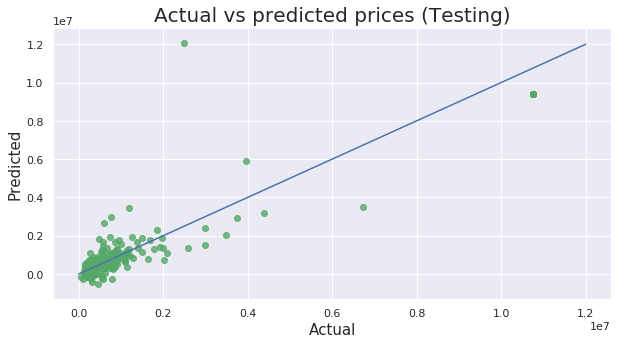

In [97]:
plt.figure(figsize=(10,5))

#y_pred = lm_poly.predict(X_poly)
#y_pred_lass = lm_Lasso.predict(X_scaled)
y_pred_lass_test = lm_Lasso.predict(X_test_scaled)

plt.plot(np.linspace(0,12000000,1000),np.linspace(0,12000000,1000))
#plt.scatter(y,y_pred,c='r')
#plt.scatter(y,y_pred_lass,alpha=0.8)
plt.scatter(y_test,y_pred_lass_test,alpha=0.8,c="g")
plt.title('Actual vs predicted prices (Testing)',fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)

In [98]:
avp = {'actual':y_test,'predicted':y_pred_lass_test}
avp=pd.DataFrame(avp)

In [99]:
avp=avp[(avp['predicted']<3000000)&(avp['actual']<3000000)]

Text(0, 0.5, 'Predicted')

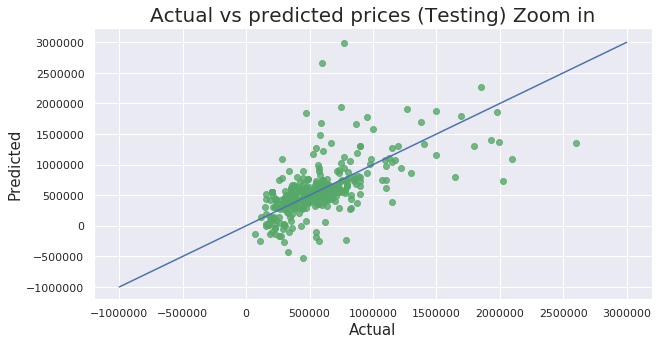

In [100]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(-1000000,3000000,1000),np.linspace(-1000000,3000000,1000))
#plt.scatter(y,y_pred,c='r')
#plt.scatter(y,y_pred_lass,alpha=0.8)
plt.scatter(avp['actual'],avp['predicted'],alpha=0.8,c="g")
plt.title('Actual vs predicted prices (Testing) Zoom in',fontsize=20)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)

In [101]:
np.sqrt(np.mean((y_pred_lass_test - y_test)**2))

696294.19713856815

In [102]:
coeffs = {'variable':list(poly.get_feature_names(X.columns)),'Coeff':list(lm_Lasso.coef_)}
coeffs = pd.DataFrame(coeffs)
coeffs2 = coeffs[(coeffs['Coeff']>0.1)|(coeffs['Coeff']<-0.1)]
coeffs2['abs']=abs(coeffs2['Coeff'])
coeffs2=coeffs2.sort_values(by='abs',ascending=True)
coeffs2

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Coeff,variable,abs
62,-55.51,Year Built Parking2_2.0,55.51
132,-512.30,Type_Townhouse Cooling2_No Central,512.30
35,1593.47,beds Parking2_0.0,1593.47
112,4811.53,Parking2_3.0 Type_Townhouse,4811.53
89,5652.77,Parking2_0.0 Cooling2_Central,5652.77
99,-11528.29,Parking2_1.0 Cooling2_No Central,11528.29
32,-13807.30,beds baths,13807.30
131,14099.94,Type_Townhouse Cooling2_Central,14099.94
106,-17065.72,Parking2_2.0 Cooling2_Central,17065.72
119,-18067.95,Type_Condo Cooling2_Central,18067.95


In [108]:
polinomial = pd.DataFrame(X_poly,columns=poly.get_feature_names(X.columns))

In [109]:
variables = coeffs2['variable']

polinomial2 = polinomial[variables]

pol2_scaled = scaler.fit_transform(polinomial2)

Text(0.5, 1.0, 'Top 15 relevant variables')

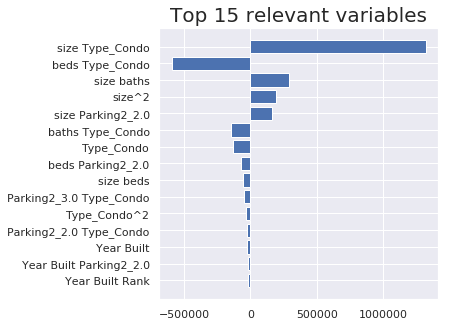

In [672]:
plt.figure(figsize=(5,5))
plt.barh(coeffs2['variable'].tail(15),coeffs2['Coeff'].tail(15))
plt.title('Top 15 relevant variables',fontsize=20)

In [577]:
X_scaled_2 = scaler.fit_transform(X)
from sklearn.linear_model import lars_path
alphas, _, coefs = lars_path(X_scaled_2, y.values, method='lasso', verbose=True)

.

/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


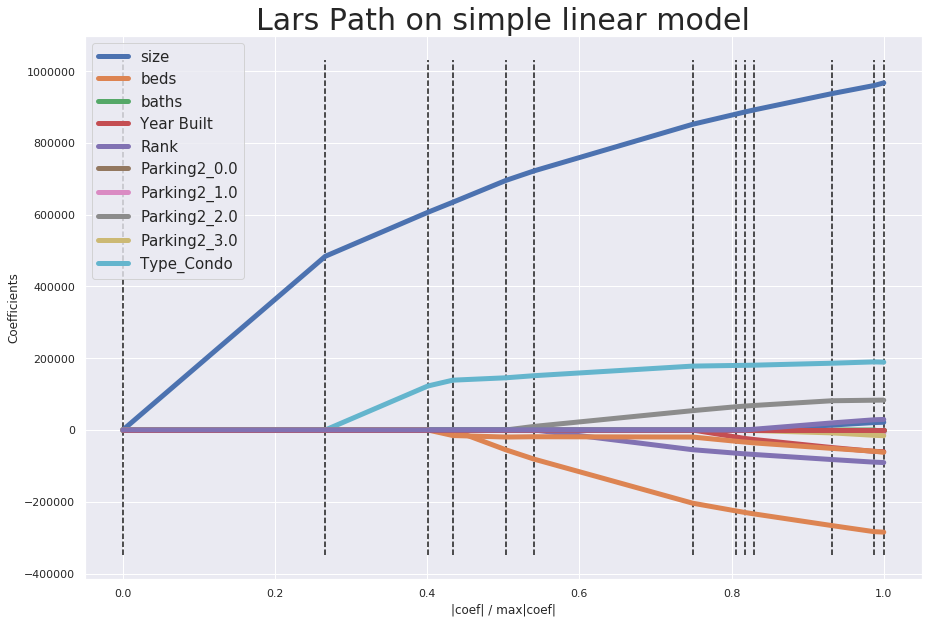

In [670]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(15,10))
plt.plot(xx, coefs.T, linewidth=5)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('Lars Path',fontsize=30)
plt.axis('tight')
plt.legend(X.columns[:10],prop={'size': 15})
plt.show()


# Not used models

In [287]:
# Try this interactions = PolynomialFeatures(degree=2, interaction_only=True)
poly2 = PolynomialFeatures(degree=2, interaction_only=True) 
X_train_poly2 = poly2.fit_transform(X_train)
X_val_poly2 = poly2.transform(X_val)
X_test_poly2 = poly2.transform(X_test)

lm_poly.fit(X_train_poly2,y_train)
lm_poly.score(X_train_poly2,y_train)
lm_poly.score(X_test_poly2,y_test)

0.82601536863791802

In [ ]:
# Try logaritmic transformation?

In [268]:
logm['size'] = denver['size'].apply(lambda x: math.log(x))
logm['price'] = denver['price'].apply(lambda x: math.log(x))
logm['beds'] = denver['beds'].apply(lambda x: math.log(x))
logm['baths'] = denver['baths'].apply(lambda x: math.log(x))
logm['Year Built'] = denver['Year Built'].apply(lambda x: math.log(x))
logm['Rank'] = denver['Rank'].apply(lambda x: math.log(x))
logm['Parking2'] = denver['Parking2']
logm['Type'] = denver['Type']
logm['Cooling2'] = denver['Cooling2']
logm = logm.dropna()
logm = pd.get_dummies(logm)
X, y = logm.drop('price',axis=1), logm['price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) #hold out 20% for validation

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()
#lm_poly = LassoCV()

In [352]:
lm_poly.fit(X_train_poly,y_train)
lm_poly.score(X_val_poly,y_val)

0.82054724772110388

In [270]:
lm_poly.score(X_test_poly,y_test)

0.82935803138154773